## RATON BASIN GEOTHERMAL WELL DATA

##### Some functions adapted from https://sainosmichelle.github.io/elements.html

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import geopandas as gpd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [5]:
df_MS48 = pd.read_excel('../data/inputs/Oil_Gas_Wells_with_Predicted_Geothermal_Properties.xlsx')
df_wells_CO = pd.read_csv('../data/inputs/COGCC wells.csv') # downloaded from COGCC 2020

In [3]:
print(df_wells_CO.columns)

Index(['API', 'API_County', 'API_Seq', 'API_Label', 'Operat_Num', 'Operator',
       'Well_Num', 'Well_Name', 'Well_Title', 'Citing_Typ', 'Spud_Date',
       'Ground_Ele', 'Max_MD', 'Max_TVD', 'Field_Code', 'Field_Name',
       'Facil_Id', 'Facil_Type', 'Facil_Stat', 'Stat_Date', 'Loc_Qual',
       'Loc_ID', 'Loc_Name', 'Dist_N_S', 'Dir_N_S', 'Dist_E_W', 'Dir_E_W',
       'Qtr_Qtr', 'Section', 'Township', 'Range', 'Meridian', 'Latitude',
       'Longitude', 'Utm_X', 'Utm_Y', 'api10'],
      dtype='object')


#### Extracting only wells at Raton Basin

In [4]:
twp_list = ['31S', '32S', '33S', '34S', '35S']
range_list = ['61W', '62W', '63W', '64W', '65W', '66W', '67W', '68W']
temp = df_MS48[df_MS48['twp'].isin(twp_list)] 
df_MS48_Raton = temp[temp['range'].isin(range_list)] 
len(df_MS48_Raton)

3736

In [5]:
twp_list = ['31S', '32S', '33S', '34S', '35S']
range_list = ['61W', '62W', '63W', '64W', '65W', '66W', '67W', '68W']
temp = df_wells_CO[df_wells_CO['Township'].isin(twp_list)] 
df_wells_Raton = temp[temp['Range'].isin(range_list)] 
len(df_wells_Raton)

3881

In [6]:
print(df_MS48_Raton.api.values)

['05-071-09485' '05-071-08913' '05-071-09487' ... '05-071-08264'
 '05-071-08269' '05-071-08268']


In [7]:
print(df_wells_Raton.API_Label.values)

['05-071-00015' '05-071-05000' '05-071-05004' ... '05-071-60001'
 '05-071-60012' '05-071-60013']


#### Wells in Raton Basin without predicted geothermal properties

In [8]:
df_wells_Raton_ngeot = df_wells_Raton[~df_wells_Raton['API_Label'].isin(df_MS48_Raton['api'])]

In [9]:
len(df_wells_Raton_ngeot)

146

In [11]:
print(df_wells_Raton_ngeot.columns)

Index(['API', 'API_County', 'API_Seq', 'API_Label', 'Operat_Num', 'Operator',
       'Well_Num', 'Well_Name', 'Well_Title', 'Citing_Typ', 'Spud_Date',
       'Ground_Ele', 'Max_MD', 'Max_TVD', 'Field_Code', 'Field_Name',
       'Facil_Id', 'Facil_Type', 'Facil_Stat', 'Stat_Date', 'Loc_Qual',
       'Loc_ID', 'Loc_Name', 'Dist_N_S', 'Dir_N_S', 'Dist_E_W', 'Dir_E_W',
       'Qtr_Qtr', 'Section', 'Township', 'Range', 'Meridian', 'Latitude',
       'Longitude', 'Utm_X', 'Utm_Y', 'api10'],
      dtype='object')


In [12]:
df_wells_Raton_ngeot[['api10', 'Spud_Date', 'Max_TVD', 'Max_MD', 'Operator', 
                  'Well_Name', 'Township', 'Range','Section']] 

,api10,Spud_Date,Max_TVD,Max_MD,Operator,Well_Name,Township,Range,Section
41827,507109770,NaN,NaN,NaN,PIONEER NATURAL RESOURCES USA INC,PARRAS,33S,68W,12
41828,507109773,NaN,NaN,NaN,PIONEER NATURAL RESOURCES USA INC,Mad City,33S,67W,25
41829,507109774,2011-04-23,NaN,1685.0,EVERGREEN NATURAL RESOURCES LLC,R&S Smith,33S,66W,1
41830,507109775,NaN,NaN,NaN,PIONEER NATURAL RESOURCES USA INC,Holst,33S,66W,6
41831,507109776,NaN,NaN,NaN,PIONEER NATURAL RESOURCES USA INC,NIKKIE,32S,65W,17
...,...,...,...,...,...,...,...,...,...
41969,507109914,NaN,NaN,NaN,XTO ENERGY INC,TOUPAL SWD,34S,67W,10
41970,507109915,NaN,NaN,NaN,KCPI LLC,WINTERS,32S,63W,8
41971,507109916,2014-04-15,NaN,7215.0,EVERGREEN NATURAL RESOURCES LLC,San Pablo,33S,67W,4
41972,507109917,NaN,NaN,NaN,PIONEER NATURAL RESOURCES USA INC,Montoya,33S,67W,7


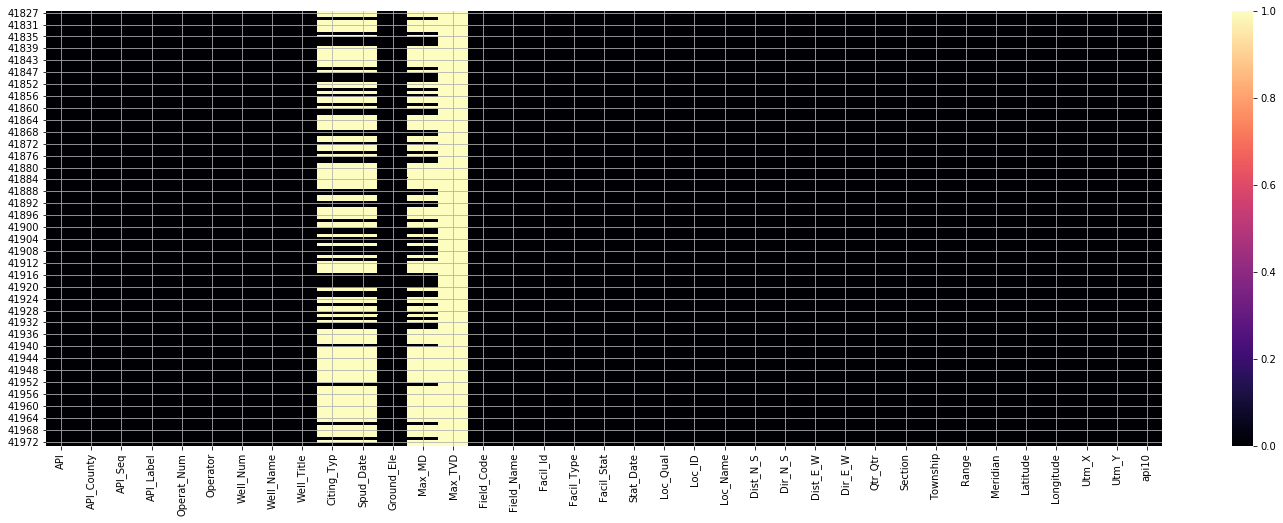

In [18]:
fig, ax = plt.subplots(figsize=(25,8))
sns.heatmap(df_wells_Raton_ngeot.isnull(), ax=ax, cmap="magma")
plt.grid()
plt.show()

In [14]:
df_wells_Raton_ngeot.describe()

,API,API_County,API_Seq,Operat_Num,Ground_Ele,Max_MD,Max_TVD,Field_Code,Facil_Id,Loc_ID,Dist_N_S,Dist_E_W,Section,Latitude,Longitude,Utm_X,Utm_Y,api10
count,1.460000e+02,146.0,146.000000,146.000000,146.000000,49.000000,0.0,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,1.460000e+02,1.460000e+02
mean,7.110188e+06,71.0,10188.363014,24973.041096,7575.390411,2232.979592,NaN,70348.479452,419820.719178,399638.630137,1352.746575,1347.945205,18.164384,37.183612,-104.831063,514991.404110,4.115263e+06,5.071102e+08
std,4.151168e+03,0.0,4151.167987,33167.420243,486.778423,1054.139746,NaN,7038.755995,17466.165883,44765.792029,775.506818,739.508856,9.644743,0.070460,0.128987,11447.180721,7.821770e+03,4.151168e+03
min,7.109770e+06,71.0,9770.000000,10084.000000,5941.000000,925.000000,NaN,27950.000000,217952.000000,307490.000000,73.000000,12.000000,1.000000,37.016965,-105.019540,498263.000000,4.096755e+06,5.071098e+08
25%,7.109809e+06,71.0,9809.250000,10084.000000,7262.250000,1800.000000,NaN,70830.000000,416443.750000,414729.250000,618.500000,678.750000,11.000000,37.144737,-104.943370,505025.250000,4.110930e+06,5.071098e+08
50%,7.109846e+06,71.0,9845.500000,10369.000000,7543.000000,2070.000000,NaN,70830.000000,421022.000000,419481.000000,1504.500000,1470.000000,18.500000,37.185690,-104.823390,515687.000000,4.115475e+06,5.071098e+08
75%,7.109882e+06,71.0,9881.750000,10705.000000,7891.750000,2390.000000,NaN,70830.000000,424563.250000,423583.000000,2014.750000,1970.750000,26.000000,37.239362,-104.744570,522657.250000,4.121436e+06,5.071099e+08
max,7.160001e+06,71.0,60001.000000,100264.000000,8947.000000,7215.000000,NaN,99999.000000,437234.000000,437235.000000,2632.000000,2679.000000,36.000000,37.337770,-104.346870,558034.000000,4.132393e+06,5.071600e+08


In [16]:
df_wells_Raton_ngeot['Operator'].unique()

array(['PIONEER NATURAL RESOURCES USA INC',
       'EVERGREEN NATURAL RESOURCES LLC', 'XTO ENERGY INC',
       'WAPITI OPERATING LLC', 'TIMBER CREEK OPERATING LLC',
       'NATURAL RESOURCE GROUP INC', 'KCPI LLC', 'SKELLY OIL COMPANY'],
      dtype=object)

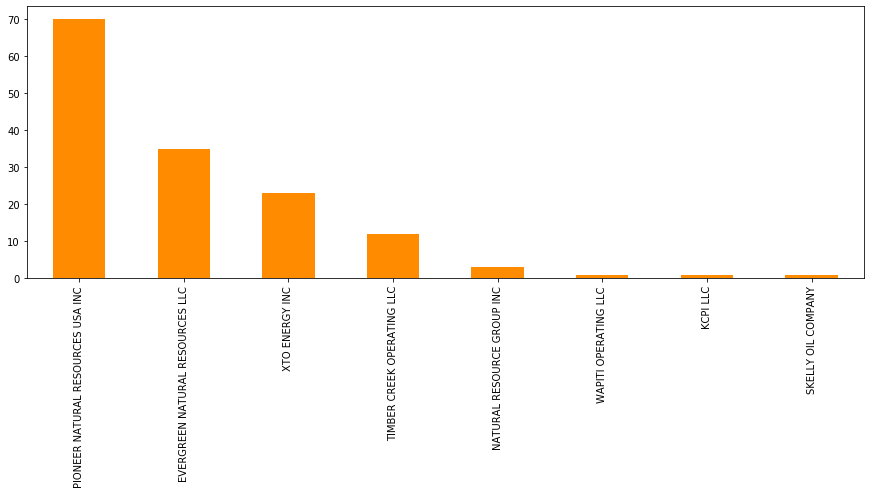

In [19]:
df_wells_Raton_ngeot['Operator'].value_counts().plot(kind='bar', figsize=(15,5), grid=False, color='darkorange' )

#### All wells Raton Basin @ 2020

In [20]:
df_wells_Raton['Spud_Date'] = df_wells_Raton['Spud_Date'].fillna('0000-00-00')
df_wells_Raton = df_wells_Raton.join(df_wells_Raton['Spud_Date'].str.split('-', expand=True).add_prefix('date'))
df_obj = df_wells_Raton.select_dtypes(['object'])
df_wells_Raton[df_obj.columns] = df_obj.apply(lambda x: x.str.strip())
df_wells_Raton['date0'] = df_wells_Raton['date0'].astype(int)

In [21]:
df_wells_Raton.head()

,API,API_County,API_Seq,API_Label,Operat_Num,Operator,Well_Num,Well_Name,Well_Title,Citing_Typ,...,Range,Meridian,Latitude,Longitude,Utm_X,Utm_Y,api10,date0,date1,date2
37999,7100015,71,15,05-071-00015,30788,"FRANKLIN, ASTON, & FAIR,INC",1,SANDOVAL,1 SANDOVAL,NaN,...,62W,6,37.104146,-104.347003,558022,4106625,507100015,0,00,00
38000,7105000,71,5000,05-071-05000,100743,COLORADO FUEL AND IRON CORPORATION* THE,1,MAXWELL GRANT (OWP),1 MAXWELL GRANT (OWP),HISTORICAL,...,63W,6,37.017524,-104.498458,544615,4096934,507105000,1923,09,15
38001,7105004,71,5004,05-071-05004,81765,STANOLIND OIL & GAS CO,1,CF&I,1 CF&I,NaN,...,63W,6,37.037826,-104.500147,544453,4099185,507105004,0,00,00
38004,7105008,71,5008,05-071-05008,83685,SULLIVAN* BRUCE,1,ROBERTS,1 ROBERTS,ACTUAL,...,61W,6,37.083176,-104.274501,564482,4104346,507105008,1954,05,24
38005,7105009,71,5009,05-071-05009,1,UNKNOWN,1,DIDERO,1 DIDERO,NaN,...,61W,6,37.073157,-104.278971,564093,4103231,507105009,0,00,00


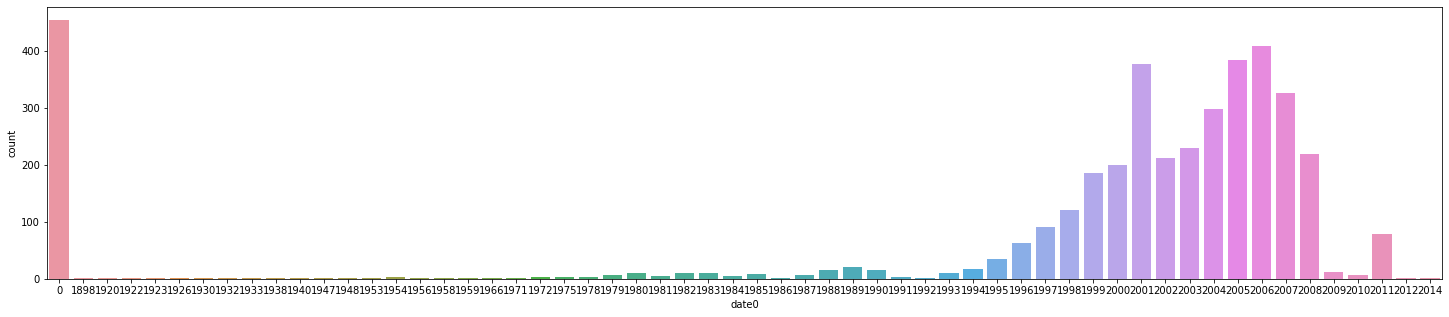

In [22]:
fig, ax = plt.subplots(figsize=(25,5))
sns.countplot(ax=ax, x=df_wells_Raton['date0'])
plt.show()